# Unsupervised ML (Clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans


# Merging different CSV files

In [2]:
df1=pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2=pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df3=pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df4=pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\03_District_wise_crimes_committed_against_children_2001_2012.csv') 
df5=pd.read_csv('C:\\Users\\Oscar Jacob\\Desktop\\Phase 1\\42_District_wise_crimes_committed_against_women_2001_2012.csv')


In [3]:
df=pd.concat([df1,df2['Total crimes against SCs'],df3['Total crimes against STs'],df4['Total crimes against children'],df5['Total crimes against women']],axis=1)

In [4]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,55,18.0,0.0,454.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,127,14.0,66.0,356.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,114,2.0,0.0,456.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,100,4.0,0.0,278.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,89,14.0,0.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,TOTAL,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,32.0,60.0,0,NaN,25.0,NaN
9014,PUDUCHERRY,KARAIKAL,2012.0,5.0,6.0,2.0,6.0,0.0,6.0,2.0,...,0.0,1.0,0.0,44.0,392.0,787.0,0,NaN,32.0,NaN
9015,PUDUCHERRY,PUDUCHERRY,2012.0,24.0,21.0,10.0,7.0,0.0,7.0,17.0,...,2.0,5.0,0.0,219.0,1668.0,3494.0,1,NaN,NaN,NaN
9016,PUDUCHERRY,TOTAL,2012.0,29.0,27.0,12.0,13.0,0.0,13.0,19.0,...,2.0,6.0,0.0,263.0,2060.0,4281.0,23,NaN,NaN,NaN


# DATA CLEANING AND PREPROCESSING

In [5]:
# Cheking columns Inforamtion using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9017
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

In [6]:
df.dtypes

STATE/UT                                                object
DISTRICT                                                object
YEAR                                                   float64
MURDER                                                 float64
ATTEMPT TO MURDER                                      float64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              float64
RAPE                                                   float64
CUSTODIAL RAPE                                         float64
OTHER RAPE                                             float64
KIDNAPPING & ABDUCTION                                 float64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            float64
KIDNAPPING AND ABDUCTION OF OTHERS                     float64
DACOITY                                                float64
PREPARATION AND ASSEMBLY FOR DACOITY                   float64
ROBBERY                                                float64
BURGLARY                                               

In [7]:
df.isnull().sum()

STATE/UT                                                 1
DISTRICT                                                 1
YEAR                                                     1
MURDER                                                   1
ATTEMPT TO MURDER                                        1
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                1
RAPE                                                     1
CUSTODIAL RAPE                                           1
OTHER RAPE                                               1
KIDNAPPING & ABDUCTION                                   1
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS              1
KIDNAPPING AND ABDUCTION OF OTHERS                       1
DACOITY                                                  1
PREPARATION AND ASSEMBLY FOR DACOITY                     1
ROBBERY                                                  1
BURGLARY                                                 1
THEFT                                                   

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [10]:
df.duplicated().sum()

0

In [11]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,55,18.0,0.0,454.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,127,14.0,66.0,356.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,114,2.0,0.0,456.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,100,4.0,0.0,278.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,89,14.0,0.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,MADHYA PRADESH,PANNA,2012.0,30.0,19.0,2.0,34.0,0.0,34.0,8.0,...,10.0,31.0,0.0,82.0,1600.0,2234.0,39,0.0,190.0,0.0
8593,MADHYA PRADESH,RAISEN,2012.0,54.0,42.0,0.0,92.0,0.0,92.0,21.0,...,0.0,72.0,0.0,173.0,1250.0,4207.0,31,0.0,120.0,739.0
8594,MADHYA PRADESH,RAJGARH,2012.0,36.0,40.0,2.0,90.0,0.0,90.0,52.0,...,25.0,50.0,0.0,140.0,3067.0,4712.0,112,0.0,197.0,2.0
8595,MADHYA PRADESH,RATLAM,2012.0,37.0,55.0,1.0,72.0,0.0,72.0,28.0,...,11.0,85.0,0.0,128.0,1404.0,3420.0,119,0.0,208.0,11.0


In [12]:
df['DISTRICT'].value_counts()

TOTAL              387
G.R.P.              45
RAILWAYS            35
NORTH               33
SOUTH               33
                  ... 
RAILWAYS KMR         1
A and N ISLANDS      1
MIDNAPUR             1
KAWARDHA             1
RAILWAYS KATRA       1
Name: DISTRICT, Length: 797, dtype: int64

We will be removing TOTAL and DELHI UT TOTAL column because it is showing the total results of all districts for each year, hence it will not be useful in our analysis

In [13]:
df = df[df['DISTRICT'] != 'TOTAL']

In [14]:
df = df[df['DISTRICT'] != 'DELHI UT TOTAL']

In [15]:
df['DISTRICT'].value_counts()

G.R.P.             45
RAILWAYS           35
NORTH              33
SOUTH              33
WEST               33
                   ..
A and N ISLANDS     1
RAILWAYS KMR        1
CRIME KASHMIR       1
JALANDHAR RURAL     1
RAILWAYS KATRA      1
Name: DISTRICT, Length: 795, dtype: int64

In [16]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,55,18.0,0.0,454.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,127,14.0,66.0,356.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,114,2.0,0.0,456.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,100,4.0,0.0,278.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,89,14.0,0.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,MADHYA PRADESH,PANNA,2012.0,30.0,19.0,2.0,34.0,0.0,34.0,8.0,...,10.0,31.0,0.0,82.0,1600.0,2234.0,39,0.0,190.0,0.0
8593,MADHYA PRADESH,RAISEN,2012.0,54.0,42.0,0.0,92.0,0.0,92.0,21.0,...,0.0,72.0,0.0,173.0,1250.0,4207.0,31,0.0,120.0,739.0
8594,MADHYA PRADESH,RAJGARH,2012.0,36.0,40.0,2.0,90.0,0.0,90.0,52.0,...,25.0,50.0,0.0,140.0,3067.0,4712.0,112,0.0,197.0,2.0
8595,MADHYA PRADESH,RATLAM,2012.0,37.0,55.0,1.0,72.0,0.0,72.0,28.0,...,11.0,85.0,0.0,128.0,1404.0,3420.0,119,0.0,208.0,11.0


In [17]:
df.reset_index(drop = True)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,34.0,175.0,0.0,181.0,1518.0,4154.0,55,18.0,0.0,454.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,24.0,154.0,0.0,270.0,754.0,4125.0,127,14.0,66.0,356.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,83.0,186.0,0.0,404.0,1262.0,5818.0,114,2.0,0.0,456.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,1.0,20.0,0.0,20.0,25.0,...,38.0,57.0,0.0,233.0,1181.0,3140.0,100,4.0,0.0,278.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,58.0,247.0,0.0,431.0,2313.0,6507.0,89,14.0,0.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,MADHYA PRADESH,PANNA,2012.0,30.0,19.0,2.0,34.0,0.0,34.0,8.0,...,10.0,31.0,0.0,82.0,1600.0,2234.0,39,0.0,190.0,0.0
8195,MADHYA PRADESH,RAISEN,2012.0,54.0,42.0,0.0,92.0,0.0,92.0,21.0,...,0.0,72.0,0.0,173.0,1250.0,4207.0,31,0.0,120.0,739.0
8196,MADHYA PRADESH,RAJGARH,2012.0,36.0,40.0,2.0,90.0,0.0,90.0,52.0,...,25.0,50.0,0.0,140.0,3067.0,4712.0,112,0.0,197.0,2.0
8197,MADHYA PRADESH,RATLAM,2012.0,37.0,55.0,1.0,72.0,0.0,72.0,28.0,...,11.0,85.0,0.0,128.0,1404.0,3420.0,119,0.0,208.0,11.0


In [18]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total crimes against SCs', 'Total crimes against STs',
       'Total crimes against children', 'Total crimes against women'],
      dtype='object')

**Dropping some columns like-**

'INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'

columns from our dataset as it comes under Total crimes against women as we already have that column in our dataset


All the crimes listed below are covered under the Indian Penal Code (IPC). The IPC is the main criminal code of India and it covers a wide range of offenses, including but not limited to:

Crimes against the body (e.g., Murder, Attempt to Murder, Culpable Homicide not amounting to Murder, Rape, Kidnapping & Abduction) 1

Crimes against property (e.g., Dacoity, Robbery, Burglary, Theft, Auto Theft) 1

Crimes against public order (e.g., Riots, Arson) 1

Economic crimes (e.g., Criminal Breach of Trust, Cheating, Counterfeiting) 1

Other crimes (e.g., Hurt/Grievous Hurt, Causing Death by Negligence) 1

Each crime is dealt with in a specific section of the IPC, which specifies the conditions under which a person can be held liable for a crime, such as intention, knowledge, negligence, etc

In [19]:
df.drop(['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','OTHER RAPE','OTHER THEFT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','OTHER IPC CRIMES'],axis=1, inplace=True)

In [20]:
df.drop(['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
       'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY',
       'BURGLARY', 'THEFT', 'AUTO THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'CAUSING DEATH BY NEGLIGENCE'],axis=1, inplace=True)

In [21]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 8199 Rows and 8 Columns in our dataframe


# REQ 4.1

**4.1  "Create 3 clusters as below :**


> 1. Sensitive Area's


> 2. Moderate Area's


> 3. Peaceful Area's

In [22]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES',
       'Total crimes against SCs', 'Total crimes against STs',
       'Total crimes against children', 'Total crimes against women'],
      dtype='object')

# Normalizing data for any type of clustering¶
Normalizing the data is important to ensure that the distance measure accords equal weight to each variable. Without normalization, the variable with the largest scale will dominate the measure.Normalization is used to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences

In [24]:
df_cluster = df[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against STs', 'Total crimes against children', 'Total crimes against women']]

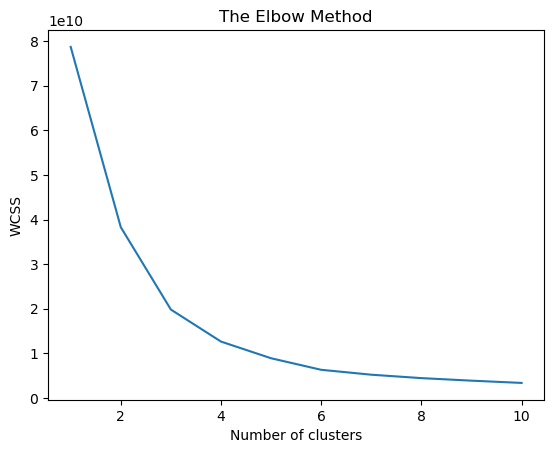

In [25]:
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Choosing k=3 as we need to form 3 cluster as per the requirements also, Elbow method is also showing the same thing.

In [26]:
# Assuming df is your DataFrame
# Select the columns to be considered for clustering
df_cluster = df[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against STs', 'Total crimes against children', 'Total crimes against women']]

# Standardize the data to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std = scaler.fit_transform(df_cluster)

# Create a KMeans instance with 3 clusters: sensitive area, moderate area and peaceful area
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit and predict 
df['Cluster Labels'] = kmeans.fit_predict(X_std)

# Now you can create a condition based on the cluster labels to categorize areas
conditions = [
    (df['Cluster Labels'] == 0),
    (df['Cluster Labels'] == 1),
    (df['Cluster Labels'] == 2)
]
choices = ['sensitive area', 'moderate area', 'peaceful area']
df['Area Type'] = np.select(conditions, choices)

In [27]:
df

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women,Cluster Labels,Area Type
0,ANDHRA PRADESH,ADILABAD,2001.0,4154.0,55,18.0,0.0,454.0,0,sensitive area
1,ANDHRA PRADESH,ANANTAPUR,2001.0,4125.0,127,14.0,66.0,356.0,0,sensitive area
2,ANDHRA PRADESH,CHITTOOR,2001.0,5818.0,114,2.0,0.0,456.0,0,sensitive area
3,ANDHRA PRADESH,CUDDAPAH,2001.0,3140.0,100,4.0,0.0,278.0,0,sensitive area
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,6507.0,89,14.0,0.0,475.0,0,sensitive area
...,...,...,...,...,...,...,...,...,...,...
8592,MADHYA PRADESH,PANNA,2012.0,2234.0,39,0.0,190.0,0.0,0,sensitive area
8593,MADHYA PRADESH,RAISEN,2012.0,4207.0,31,0.0,120.0,739.0,0,sensitive area
8594,MADHYA PRADESH,RAJGARH,2012.0,4712.0,112,0.0,197.0,2.0,0,sensitive area
8595,MADHYA PRADESH,RATLAM,2012.0,3420.0,119,0.0,208.0,11.0,0,sensitive area


# Model Evaluation

In [28]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score

In [29]:
# Assuming X_std is your standardized data and kmeans is your fitted KMeans model
score = silhouette_score(X_std,df['Cluster Labels'])

print('Silhouette Score: ', score*100)

Silhouette Score:  49.64012381501121


# REQ 4.2 

# Create DataFrame for each cluster that shows data according to the areas.

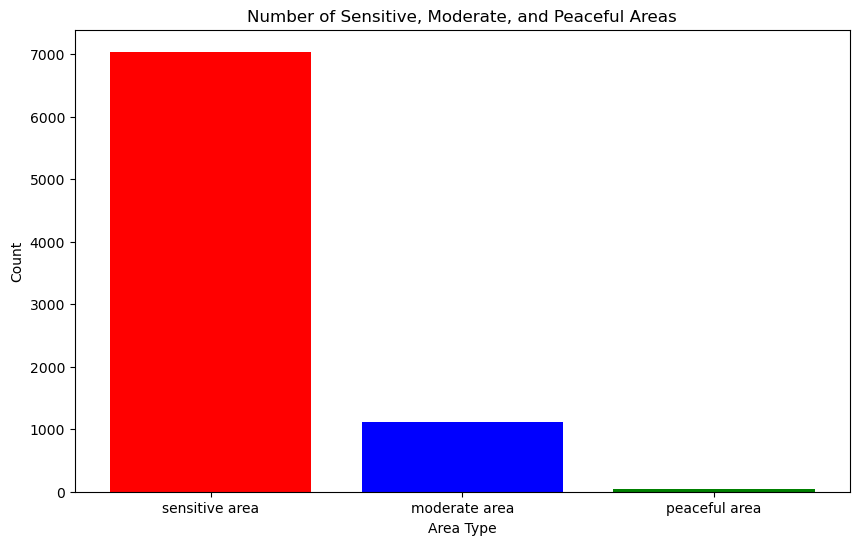

In [31]:
# Count the number of each area type
area_counts = df['Area Type'].value_counts()

# Create a bar graph
plt.figure(figsize=(10,6))
plt.bar(area_counts.index, area_counts.values, color=['red', 'blue', 'green'])
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.title('Number of Sensitive, Moderate, and Peaceful Areas')
plt.show()

In [32]:
df_sensitive = df[df['Area Type'] == 'sensitive area']
df_moderate = df[df['Area Type'] == 'moderate area']
df_peaceful = df[df['Area Type'] == 'peaceful area']

In [33]:
df_sensitive

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women,Cluster Labels,Area Type
0,ANDHRA PRADESH,ADILABAD,2001.0,4154.0,55,18.0,0.0,454.0,0,sensitive area
1,ANDHRA PRADESH,ANANTAPUR,2001.0,4125.0,127,14.0,66.0,356.0,0,sensitive area
2,ANDHRA PRADESH,CHITTOOR,2001.0,5818.0,114,2.0,0.0,456.0,0,sensitive area
3,ANDHRA PRADESH,CUDDAPAH,2001.0,3140.0,100,4.0,0.0,278.0,0,sensitive area
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,6507.0,89,14.0,0.0,475.0,0,sensitive area
...,...,...,...,...,...,...,...,...,...,...
8592,MADHYA PRADESH,PANNA,2012.0,2234.0,39,0.0,190.0,0.0,0,sensitive area
8593,MADHYA PRADESH,RAISEN,2012.0,4207.0,31,0.0,120.0,739.0,0,sensitive area
8594,MADHYA PRADESH,RAJGARH,2012.0,4712.0,112,0.0,197.0,2.0,0,sensitive area
8595,MADHYA PRADESH,RATLAM,2012.0,3420.0,119,0.0,208.0,11.0,0,sensitive area


In [34]:
df_moderate

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women,Cluster Labels,Area Type
6,ANDHRA PRADESH,GUNTUR,2001.0,7848.0,141,35.0,0.0,758.0,1,moderate area
7,ANDHRA PRADESH,HYDERABAD CITY,2001.0,11831.0,79,2.0,25.0,991.0,1,moderate area
8,ANDHRA PRADESH,KARIMNAGAR,2001.0,5811.0,156,17.0,9.0,886.0,1,moderate area
9,ANDHRA PRADESH,KHAMMAM,2001.0,4582.0,161,42.0,0.0,782.0,1,moderate area
10,ANDHRA PRADESH,KRISHNA,2001.0,4779.0,279,49.0,18.0,613.0,1,moderate area
...,...,...,...,...,...,...,...,...,...,...
8560,MADHYA PRADESH,ASHOK NAGAR,2012.0,2474.0,19,2.0,56.0,1191.0,1,moderate area
8561,MADHYA PRADESH,BALAGHAT,2012.0,2792.0,57,2.0,108.0,4206.0,1,moderate area
8562,MADHYA PRADESH,BARWANI,2012.0,2026.0,25,0.0,5.0,2521.0,1,moderate area
8563,MADHYA PRADESH,BETUL,2012.0,3080.0,12,4.0,218.0,1128.0,1,moderate area


In [35]:
df_peaceful

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women,Cluster Labels,Area Type
3438,SIKKIM,EAST,2005.0,271.0,3795,0.0,2.0,10.0,2,peaceful area
3558,UTTARAKHAND,ALMORA,2005.0,254.0,4397,7.0,1.0,107.0,2,peaceful area
3655,ARUNACHAL PRADESH,CHANGLANG,2006.0,153.0,3891,0.0,0.0,46.0,2,peaceful area
3994,MAHARASHTRA,AHMEDNAGAR,2006.0,6173.0,4214,0.0,36.0,91.0,2,peaceful area
4178,SIKKIM,EAST,2006.0,344.0,3910,0.0,2.0,6.0,2,peaceful area
4298,UTTARAKHAND,ALMORA,2006.0,249.0,4960,0.0,1.0,17.0,2,peaceful area
4395,ARUNACHAL PRADESH,CHANGLANG,2007.0,171.0,3383,27.0,0.0,110.0,2,peaceful area
4487,CHHATTISGARH,BALRAMPUR,2007.0,658.0,2786,50.0,46.0,323.0,2,peaceful area
4736,MAHARASHTRA,AHMEDNAGAR,2007.0,6753.0,4106,0.0,83.0,465.0,2,peaceful area
4921,SIKKIM,EAST,2007.0,328.0,4174,0.0,0.0,164.0,2,peaceful area


# REQ 4.3 

# "Analyse your clusters and prepare a report that explains all your observations.



**Analysis of Sensitive Areas**

In [36]:
df_sensitive


,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women,Cluster Labels,Area Type
0,ANDHRA PRADESH,ADILABAD,2001.0,4154.0,55,18.0,0.0,454.0,0,sensitive area
1,ANDHRA PRADESH,ANANTAPUR,2001.0,4125.0,127,14.0,66.0,356.0,0,sensitive area
2,ANDHRA PRADESH,CHITTOOR,2001.0,5818.0,114,2.0,0.0,456.0,0,sensitive area
3,ANDHRA PRADESH,CUDDAPAH,2001.0,3140.0,100,4.0,0.0,278.0,0,sensitive area
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,6507.0,89,14.0,0.0,475.0,0,sensitive area
...,...,...,...,...,...,...,...,...,...,...
8592,MADHYA PRADESH,PANNA,2012.0,2234.0,39,0.0,190.0,0.0,0,sensitive area
8593,MADHYA PRADESH,RAISEN,2012.0,4207.0,31,0.0,120.0,739.0,0,sensitive area
8594,MADHYA PRADESH,RAJGARH,2012.0,4712.0,112,0.0,197.0,2.0,0,sensitive area
8595,MADHYA PRADESH,RATLAM,2012.0,3420.0,119,0.0,208.0,11.0,0,sensitive area


**Top 10 States with Highest Total IPC Crimes**

In [58]:
state_crimes = df_sensitive.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()

# Sort the states by total crimes in descending order
state_crimes = state_crimes.sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_crimes.head(10)

print(top_10_states)

STATE/UT
MADHYA PRADESH    2021773.0
ANDHRA PRADESH    1724425.0
TAMIL NADU        1681022.0
MAHARASHTRA       1642743.0
RAJASTHAN         1512479.0
UTTAR PRADESH     1509211.0
KARNATAKA         1239235.0
BIHAR             1177654.0
KERALA            1170230.0
GUJARAT           1142453.0
Name: TOTAL IPC CRIMES, dtype: float64


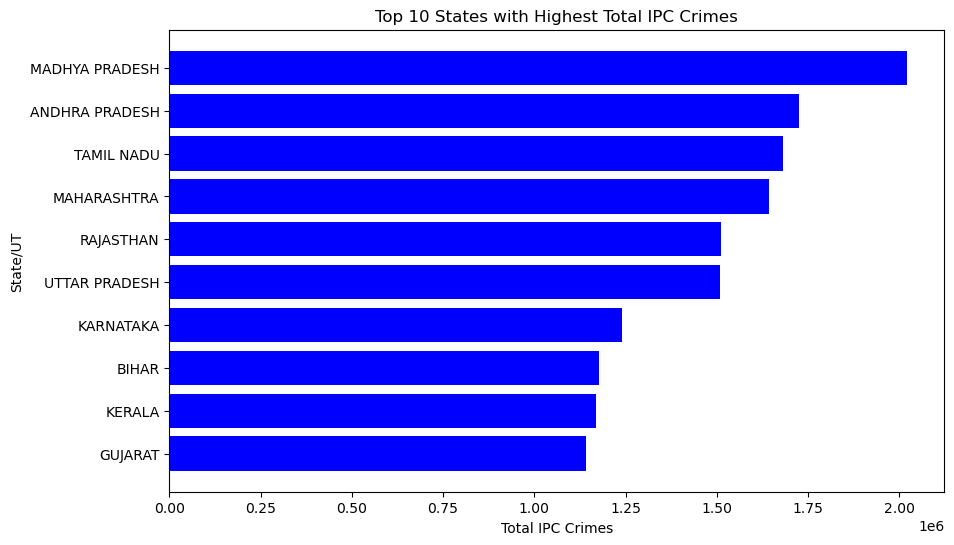

In [59]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_states.index, top_10_states.values, color='blue')
plt.xlabel('Total IPC Crimes')
plt.ylabel('State/UT')
plt.title('Top 10 States with Highest Total IPC Crimes')
plt.gca().invert_yaxis()  # To display the state with the highest crime at the top
plt.show()


**Top 10 States with Highest Total crimes against SCs**

In [60]:
state_crimes = df_sensitive.groupby('STATE/UT')['Total crimes against SCs'].sum()

# Sort the states by total crimes in descending order
state_crimes = state_crimes.sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_crimes.head(10)

print(top_10_states)

STATE/UT
UTTAR PRADESH     65172
MADHYA PRADESH    45081
RAJASTHAN         44316
ANDHRA PRADESH    34114
BIHAR             27904
KARNATAKA         24729
TAMIL NADU        15467
ODISHA            14389
GUJARAT           13061
PUNJAB            11906
Name: Total crimes against SCs, dtype: int64


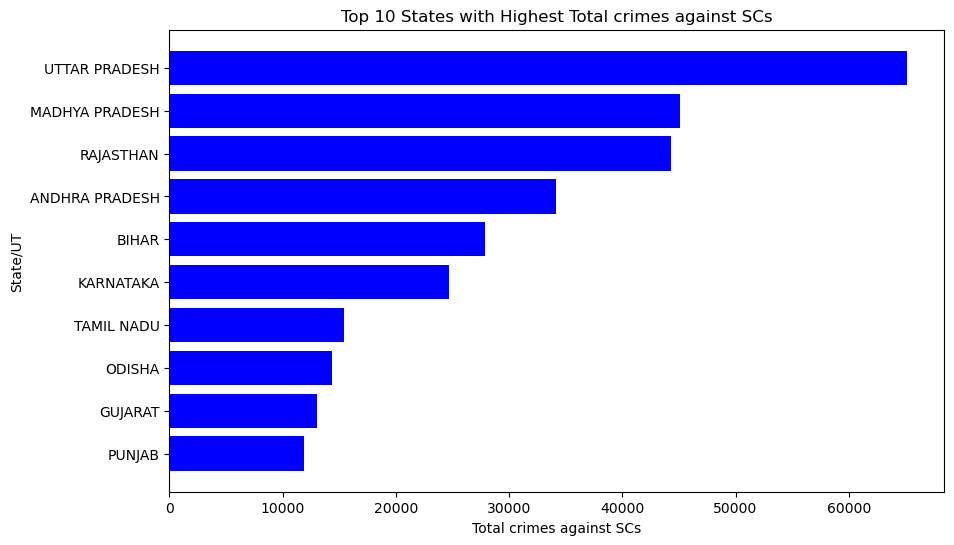

In [61]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_states.index, top_10_states.values, color='blue')
plt.xlabel('Total crimes against SCs')
plt.ylabel('State/UT')
plt.title('Top 10 States with Highest Total crimes against SCs')
plt.gca().invert_yaxis()  # To display the state with the highest crime at the top
plt.show()

**Top 10 States with Highest Total crimes against STs**

In [62]:
state_crimes = df_sensitive.groupby('STATE/UT')['Total crimes against STs'].sum()

# Sort the states by total crimes in descending order
state_crimes = state_crimes.sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_crimes.head(10)

print(top_10_states)

STATE/UT
BIHAR              2005.0
UTTAR PRADESH      1999.0
ANDHRA PRADESH     1608.0
ASSAM              1321.0
GUJARAT            1236.0
MADHYA PRADESH     1205.0
KARNATAKA          1018.0
JAMMU & KASHMIR     993.0
CHHATTISGARH        959.0
JHARKHAND           904.0
Name: Total crimes against STs, dtype: float64


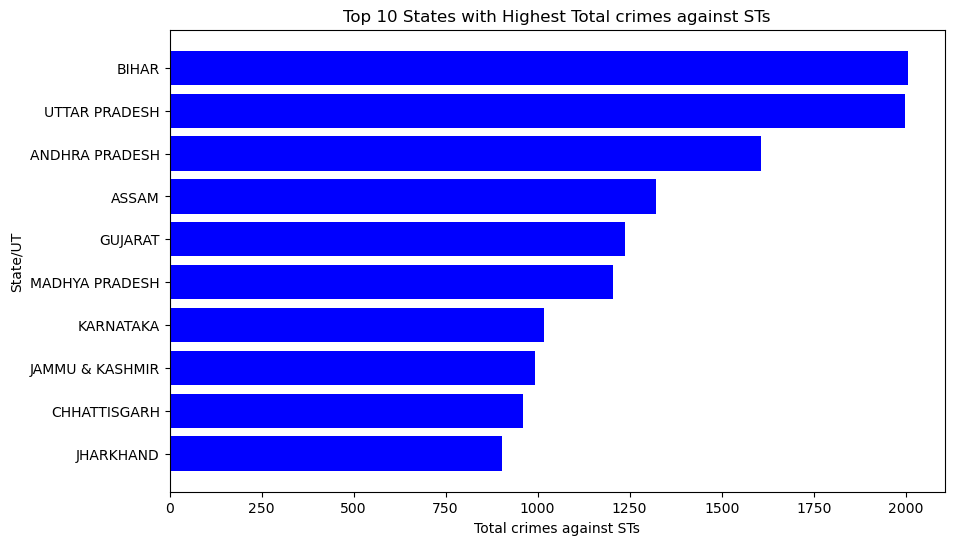

In [63]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_states.index, top_10_states.values, color='blue')
plt.xlabel('Total crimes against STs')
plt.ylabel('State/UT')
plt.title('Top 10 States with Highest Total crimes against STs')
plt.gca().invert_yaxis()  # To display the state with the highest crime at the top
plt.show()

**Top 10 States with Highest Total crimes against children**

In [64]:
state_crimes = df_sensitive.groupby('STATE/UT')['Total crimes against children'].sum()

# Sort the states by total crimes in descending order
state_crimes = state_crimes.sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_crimes.head(10)

print(top_10_states)

STATE/UT
MADHYA PRADESH    73681.0
UTTAR PRADESH     51483.0
MAHARASHTRA       44606.0
DELHI UT          30396.0
ANDHRA PRADESH    25152.0
CHHATTISGARH      19857.0
BIHAR             17906.0
GUJARAT           17864.0
RAJASTHAN         16866.0
KERALA            11147.0
Name: Total crimes against children, dtype: float64


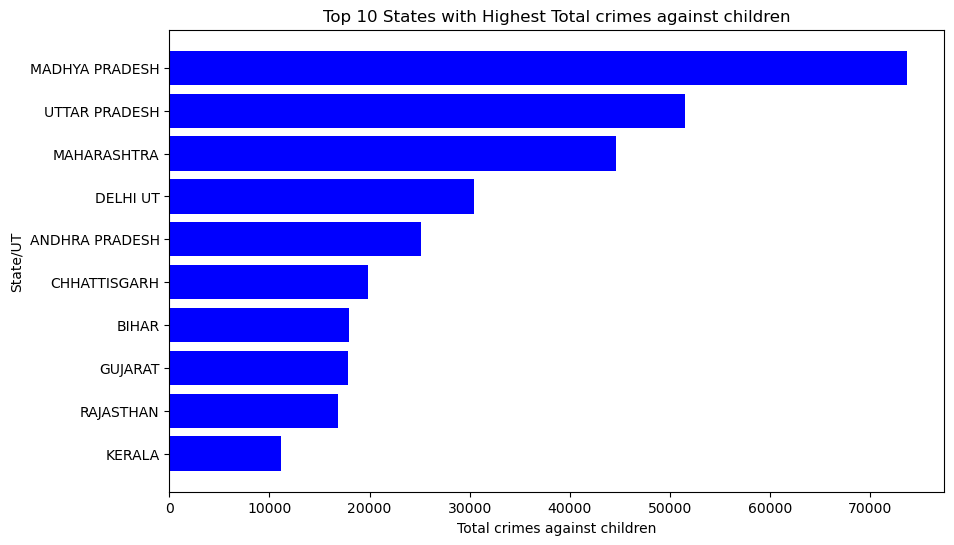

In [65]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_states.index, top_10_states.values, color='blue')
plt.xlabel('Total crimes against children')
plt.ylabel('State/UT')
plt.title('Top 10 States with Highest Total crimes against children')
plt.gca().invert_yaxis()  # To display the state with the highest crime at the top
plt.show()

**Top 10 States with Highest 'Total crimes against women'**

In [66]:
state_crimes = df_sensitive.groupby('STATE/UT')['Total crimes against women'].sum()

# Sort the states by total crimes in descending order
state_crimes = state_crimes.sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_crimes.head(10)

print(top_10_states)

STATE/UT
UTTAR PRADESH     116834.0
MADHYA PRADESH     95447.0
BIHAR              75963.0
MAHARASHTRA        73518.0
TAMIL NADU         69952.0
RAJASTHAN          68563.0
ODISHA             66700.0
KARNATAKA          59282.0
ANDHRA PRADESH     56932.0
ASSAM              51211.0
Name: Total crimes against women, dtype: float64


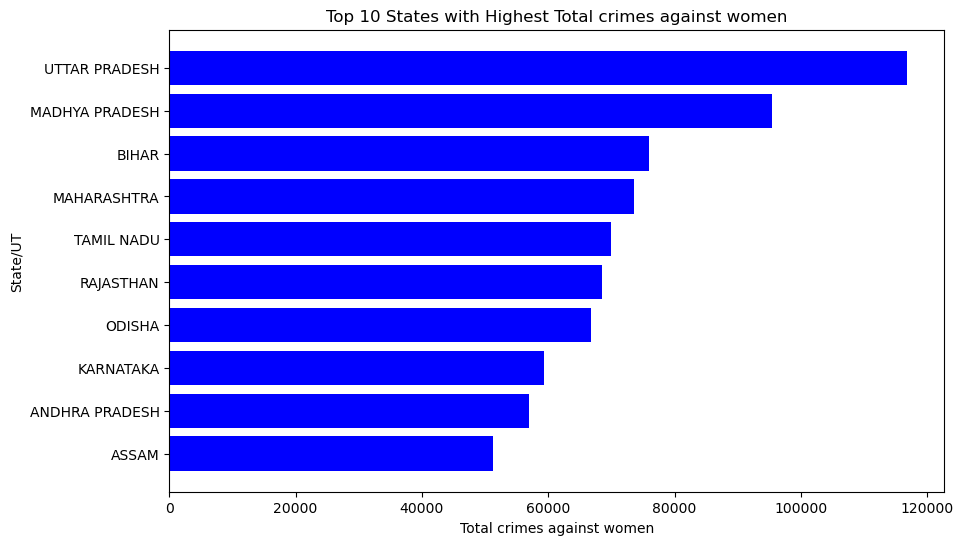

In [67]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_states.index, top_10_states.values, color='blue')
plt.xlabel('Total crimes against women')
plt.ylabel('State/UT')
plt.title('Top 10 States with Highest Total crimes against women')
plt.gca().invert_yaxis()  # To display the state with the highest crime at the top
plt.show()

**Top 10 Districts with Highest Total IPC Crimes**

In [68]:
district_crimes = df_sensitive.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()

# Sort the districts by total crimes in descending order
district_crimes = district_crimes.sort_values(ascending=False)

# Select the top 10 districts
top_10_districts = district_crimes.head(10)

print(top_10_districts)

DISTRICT
BANGALORE COMMR.    291563.0
AHMEDABAD COMMR.    187199.0
INDORE              175208.0
HYDERABAD CITY      173824.0
MUMBAI COMMR.       159515.0
BHOPAL              142851.0
CYBERABAD           141743.0
KOLKATA             123668.0
ERNAKULAM RURAL     122473.0
PATNA               119339.0
Name: TOTAL IPC CRIMES, dtype: float64


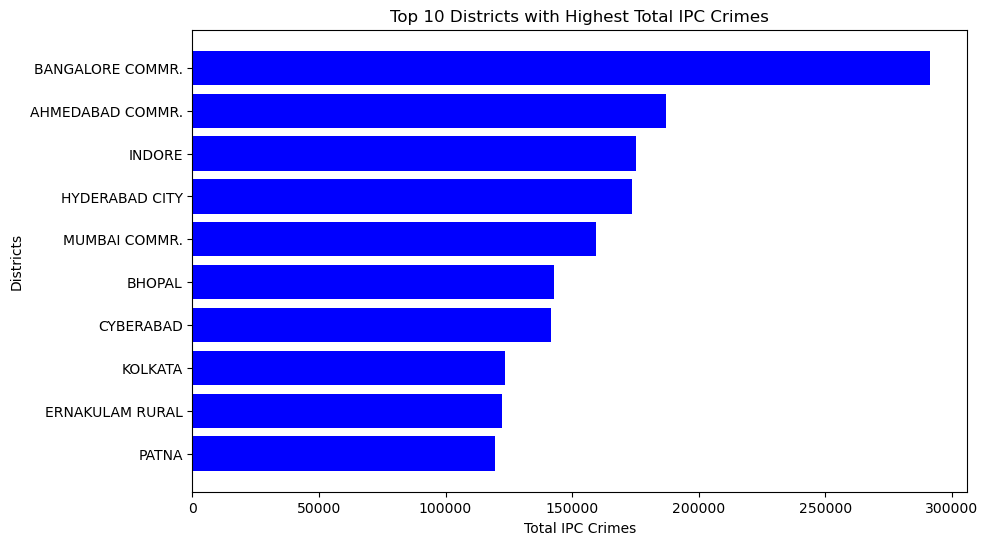

In [69]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_districts.index, top_10_districts.values, color='blue')
plt.xlabel('Total IPC Crimes')
plt.ylabel('Districts')
plt.title('Top 10 Districts with Highest Total IPC Crimes')
plt.gca().invert_yaxis()  # To display the districts with the highest crime at the top
plt.show()

**Analysis of Peaceful Area**

In [55]:
df_peaceful

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against STs,Total crimes against children,Total crimes against women,Cluster Labels,Area Type
3438,SIKKIM,EAST,2005.0,271.0,3795,0.0,2.0,10.0,2,peaceful area
3558,UTTARAKHAND,ALMORA,2005.0,254.0,4397,7.0,1.0,107.0,2,peaceful area
3655,ARUNACHAL PRADESH,CHANGLANG,2006.0,153.0,3891,0.0,0.0,46.0,2,peaceful area
3994,MAHARASHTRA,AHMEDNAGAR,2006.0,6173.0,4214,0.0,36.0,91.0,2,peaceful area
4178,SIKKIM,EAST,2006.0,344.0,3910,0.0,2.0,6.0,2,peaceful area
4298,UTTARAKHAND,ALMORA,2006.0,249.0,4960,0.0,1.0,17.0,2,peaceful area
4395,ARUNACHAL PRADESH,CHANGLANG,2007.0,171.0,3383,27.0,0.0,110.0,2,peaceful area
4487,CHHATTISGARH,BALRAMPUR,2007.0,658.0,2786,50.0,46.0,323.0,2,peaceful area
4736,MAHARASHTRA,AHMEDNAGAR,2007.0,6753.0,4106,0.0,83.0,465.0,2,peaceful area
4921,SIKKIM,EAST,2007.0,328.0,4174,0.0,0.0,164.0,2,peaceful area


**Top 10 states with Lowest IPC crimes**

In [80]:
state_crimes = df_peaceful.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()

# Sort the states by total crimes in descending order
state_crimes = state_crimes.sort_values(ascending=True)

# Select the top 10 states
top_10_states = state_crimes.tail(10)

print(top_10_states)

STATE/UT
ARUNACHAL PRADESH      608.0
UTTARAKHAND           1584.0
SIKKIM                2060.0
CHHATTISGARH          5104.0
MAHARASHTRA          41389.0
KERALA               42351.0
Name: TOTAL IPC CRIMES, dtype: float64


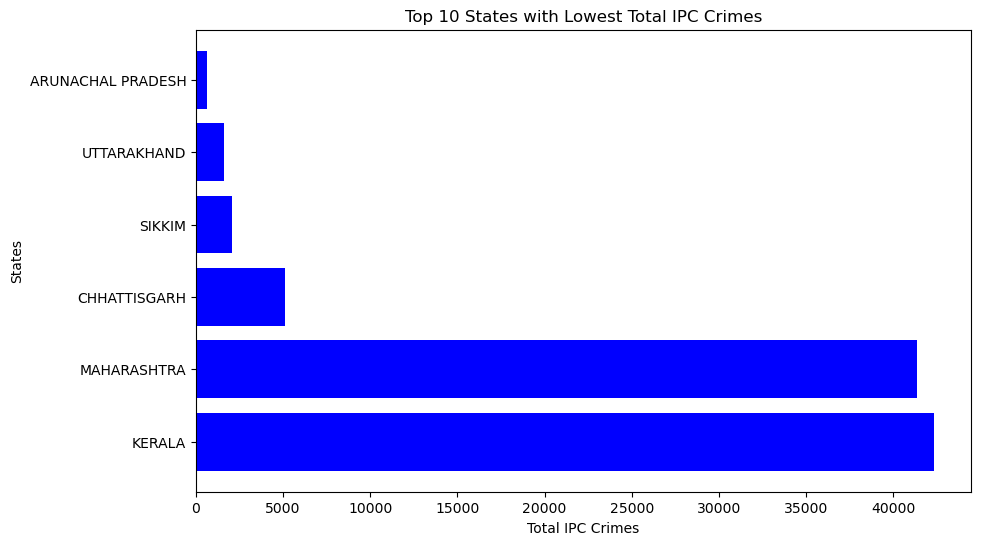

In [81]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_states.index, top_10_states.values, color='blue')
plt.xlabel('Total IPC Crimes')
plt.ylabel('States')
plt.title('Top 10 States with Lowest Total IPC Crimes')
plt.gca().invert_yaxis()  # To display the districts with the highest crime at the top
plt.show()

**Top 10 Districts with Lowest Total IPC crimes**

In [82]:
district_crimes = df_peaceful.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()

# Sort the states by total crimes in descending order
district_crimes = district_crimes.sort_values(ascending=True)

# Select the top 10 states
top_10_district = district_crimes.tail(10)

print(top_10_district)

DISTRICT
ANJAW            85.0
CHANGLANG       523.0
BALOD          1117.0
ALMORA         1584.0
EAST           2060.0
BALRAMPUR      3987.0
AHMEDNAGAR    41389.0
ALAPUZHA      42351.0
Name: TOTAL IPC CRIMES, dtype: float64


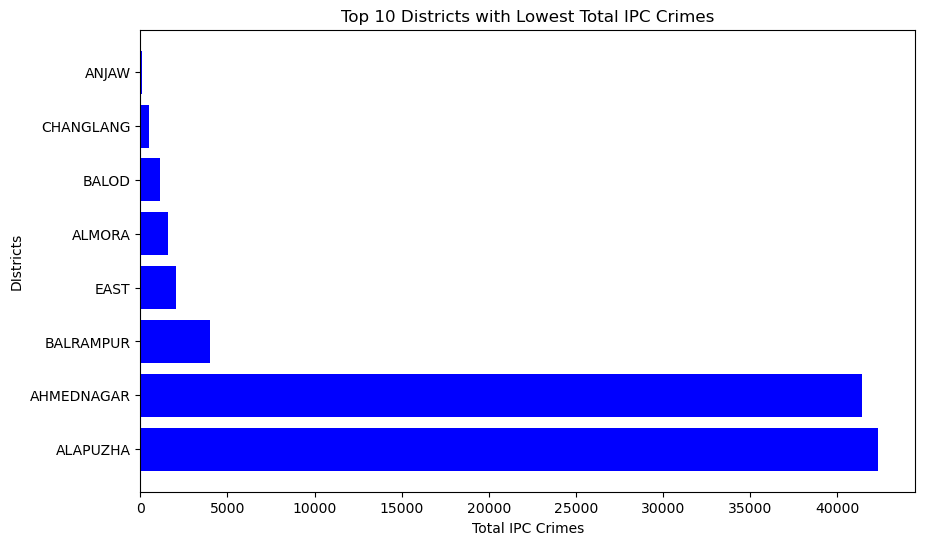

In [85]:
# Create a bar graph
plt.figure(figsize=(10,6))
plt.barh(top_10_district.index, top_10_district.values, color='blue')
plt.xlabel('Total IPC Crimes')
plt.ylabel('DIstricts')
plt.title('Top 10 Districts with Lowest Total IPC Crimes')
plt.gca().invert_yaxis()  # To display the districts with the lowest crime at the top
plt.show()

# Most Safe and Unsafe Districts

**Safe Districts**

> From the above graphs it is clear that the most safe districts are **ANJAW ,CHANGLANG,BALOD,ALMORA,EAST,BALRAMPUR,AHMEDNAGAR,ALAPUZHA**   as the total crimes are lesser there and they are clustered into peaceful areas   


**Unsafe Districts**

> From the above graphs it is clear that the most safe districts are **BANGALORE COMMR,AHMEDABAD COMMR,INDORE,HYDERABAD CITY,MUMBAI COMMR,BHOPAL,CYBERABAD,KOLKATA,ERNAKULAM RURAL,PATNA**   as the total crimes are more there and they are clustered into sensitive areas

# What is impacting more crimes in sensitive areas and what needs to be done to reduce crimes

Analyzing the factors that may be impacting crime rates in sensitive areas involves a multidimensional approach, as crime is influenced by various social, economic, and environmental factors. Here are some key aspects to consider when trying to understand what might be impacting crime rates in sensitive areas:

**Socioeconomic Factors:**

> **Poverty**: High levels of poverty can lead to increased crime rates as individuals may resort to illegal activities due to economic hardships.


> **Unemployment**: Areas with high unemployment rates may experience higher crime rates, as lack of employment opportunities can contribute to frustration and criminal behavior.


> **Education**: Low Education Levels: Lack of education can contribute to a higher likelihood of engaging in criminal activities. Improving educational opportunities may help reduce crime rates in the long run.


**Policing and Law Enforcement:**

> **Effective Policing**: The quality and effectiveness of law enforcement in an area can impact crime rates. Adequate policing, community engagement, and crime prevention strategies are crucial.


**Social Services:**

> **Access to Social Services**: Availability of social services, such as mental health support, addiction treatment, and rehabilitation programs, can contribute to crime prevention.


**Community Engagement:**

> **Community Involvement:** Active community engagement and programs can foster a sense of belonging and discourage criminal behavior. Neighborhood watch programs and community policing initiatives can be effective.


**Substance Abuse:**

> **Drug and Alcohol Abuse:** High rates of substance abuse can contribute to criminal activities. Addressing substance abuse through prevention and treatment programs may impact crime rates.


**Gang Activity:**

> **Gang Presence:** Areas with high gang activity may experience elevated crime rates. Focusing on gang prevention, intervention, and rehabilitation can be important.

**Infrastructure and Urban Planning:**

> **Urban Design:** Poorly designed urban areas may contribute to crime. Improving infrastructure and urban planning can enhance safety.


**Cultural and Social Norms:**

> **Cultural Influences:** Cultural factors and social norms can play a role in shaping behavior. Understanding and addressing cultural issues may be crucial.


**Technology and Surveillance:**

> **Crime Surveillance:** Utilizing technology for crime surveillance and prevention can be effective in sensitive areas.


It's important to note that crime is a complex and multifaceted issue, and the factors influencing crime rates can vary from one area to another. Conducting a thorough analysis, possibly with the help of local authorities, community leaders, and experts, is essential for a more accurate understanding of the specific dynamics at play in the identified sensitive areas.







# REQ 4.4

# Capstone project overall story

**Phase 1**

> Collection of data from various sources

> Analysing and preparing dataset for further analysis in the next phase

> Understanding the project requirement and gaining relevant knowledge from different sources

> Taking assumptions wherever data was unavailable


**Phase 2**

> Analysis of the collected datasets

> Overall analysis of finding out if there is any impact of literacy rate on total crimes, and which states have the highest crime rate and what can be the factors that can be causing them. We analysed that area and total population have some impact on crime rate, as states with lower area and lesser population had less crime rates as compared to those which are overpopulated.

> Juvenile crimes can be a result of lack of education, socio economic conditions and poverty. State governments should implement poilcies which can reduce juvenile crimes.



**Phase 3**

> SQL operations. Complete analysis on district wise crimes data provided



**Phase 4**

> This was also district wise and state wise analysis

> We created 3 clusters using kmeans clustering method.

> Sensitive Areas - The areas which have highest crime rates are clustered into this. We found out that Madhyapradesh has the highest number of IPC Crimes, Uttar pradesh has the highest number of cases recorded in crimes against SCs , Bihar has the highest number of cases recorded for crimes against STs

> Peaceful Areas - The areas which have the lowest crime rates are clustered into these. Some of the peaceful states are Arunachal Pradesh, Sikkim, Uttarakhand etc and some of the safest districts are Anjaw, Changland, Balod etc



We looked into the factors that can be a cause for the crime rates to be increased in some of the areas and possble solutions.